In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

In [26]:
sales = pd.read_csv("Al-Bundy_raw-data.csv")

In [27]:
print(sales)

       InvoiceNo        Date         Country  ProductID  Shop  Gender  \
0          52389    1/1/2014  United Kingdom       2152   UK2    Male   
1          52390    1/1/2014   United States       2230  US15    Male   
2          52391    1/1/2014          Canada       2160  CAN7    Male   
3          52392    1/1/2014   United States       2234   US6  Female   
4          52393    1/1/2014  United Kingdom       2222   UK4  Female   
...          ...         ...             ...        ...   ...     ...   
14962      65773  12/31/2016  United Kingdom       2154   UK2    Male   
14963      65774  12/31/2016   United States       2181  US12  Female   
14964      65775  12/31/2016          Canada       2203  CAN6    Male   
14965      65776  12/31/2016         Germany       2231  GER1  Female   
14966      65777  12/31/2016         Germany       2156  GER1  Female   

       Size (US) Size (Europe)  Size (UK)  UnitPrice  Discount  Year  Month  \
0           11.0            44       10.5   

In [28]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [29]:
sales.dtypes

InvoiceNo                 int64
Date             datetime64[ns]
Country                  object
ProductID                 int64
Shop                     object
Gender                   object
Size (US)               float64
Size (Europe)            object
Size (UK)               float64
UnitPrice                 int64
Discount                float64
Year                      int64
Month                     int64
SalePrice               float64
dtype: object

In [30]:
sales['quarter'] = 1
sales['net']=1

In [31]:
def quarter(cols):
    quarter = cols[0]
    month = cols[1]
    while quarter == 1:
        if  month <= 3:
            return 'Q1'
        elif month <= 6:
            return 'Q2'
        elif month <= 9:
            return 'Q3'
        else:
            return 'Q4' 
def net(cols):
    net=cols[0]
    ProLoss=cols[1]
    while net == 1:
            if ProLoss < 0:
                return 'L'
            elif ProLoss > 0:
                return 'P'
            else:
                return '-'

In [32]:
sales["quarter"] = sales[['quarter','Month']].apply(quarter,axis=1)


In [33]:
sales["ProLoss"]=sales['SalePrice']-sales['UnitPrice']

In [34]:
sales['net'] = sales[['net','ProLoss']].apply(net,axis=1)


In [35]:
sales

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice,quarter,net,ProLoss
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0,Q1,-,0.0
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2,Q1,L,-39.8
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2,Q1,L,-29.8
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0,Q1,-,0.0
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0,Q1,-,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,2016-12-31,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,139,0.0,2016,12,139.0,Q4,-,0.0
14963,65774,2016-12-31,United States,2181,US12,Female,12.0,42-43,10.0,149,0.0,2016,12,149.0,Q4,-,0.0
14964,65775,2016-12-31,Canada,2203,CAN6,Male,10.5,43-44,10.0,179,0.3,2016,12,125.3,Q4,L,-53.7
14965,65776,2016-12-31,Germany,2231,GER1,Female,9.5,40,7.5,199,0.0,2016,12,199.0,Q4,-,0.0


In [36]:
sales_mini = sales.drop(['InvoiceNo', 'ProductID','Size (Europe)', 'Size (UK)', 'UnitPrice', 'Discount', 'Date'], axis=1)

In [37]:
sales_mini

,Country,Shop,Gender,Size (US),Year,Month,SalePrice,quarter,net,ProLoss
0,United Kingdom,UK2,Male,11.0,2014,1,159.0,Q1,-,0.0
1,United States,US15,Male,11.5,2014,1,159.2,Q1,L,-39.8
2,Canada,CAN7,Male,9.5,2014,1,119.2,Q1,L,-29.8
3,United States,US6,Female,9.5,2014,1,159.0,Q1,-,0.0
4,United Kingdom,UK4,Female,9.0,2014,1,159.0,Q1,-,0.0
...,...,...,...,...,...,...,...,...,...,...
14962,United Kingdom,UK2,Male,9.5,2016,12,139.0,Q4,-,0.0
14963,United States,US12,Female,12.0,2016,12,149.0,Q4,-,0.0
14964,Canada,CAN6,Male,10.5,2016,12,125.3,Q4,L,-53.7
14965,Germany,GER1,Female,9.5,2016,12,199.0,Q4,-,0.0


In [38]:
sales_mini

,Country,Shop,Gender,Size (US),Year,Month,SalePrice,quarter,net,ProLoss
0,United Kingdom,UK2,Male,11.0,2014,1,159.0,Q1,-,0.0
1,United States,US15,Male,11.5,2014,1,159.2,Q1,L,-39.8
2,Canada,CAN7,Male,9.5,2014,1,119.2,Q1,L,-29.8
3,United States,US6,Female,9.5,2014,1,159.0,Q1,-,0.0
4,United Kingdom,UK4,Female,9.0,2014,1,159.0,Q1,-,0.0
...,...,...,...,...,...,...,...,...,...,...
14962,United Kingdom,UK2,Male,9.5,2016,12,139.0,Q4,-,0.0
14963,United States,US12,Female,12.0,2016,12,149.0,Q4,-,0.0
14964,Canada,CAN6,Male,10.5,2016,12,125.3,Q4,L,-53.7
14965,Germany,GER1,Female,9.5,2016,12,199.0,Q4,-,0.0


# ROLL UP :

### Total number of shoes sold by each shop.

In [39]:
sales_count =sales.groupby('Shop').size()
print(sales_count)

Shop
CAN1     372
CAN2     438
CAN3     435
CAN5     411
CAN6     861
CAN7     435
GER1    1836
GER2    1947
GER3     609
UK1      345
UK2      345
UK3      372
UK4      351
UK5      324
US1      234
US10     216
US11     180
US12     972
US13    1011
US14     633
US15    1044
US2      150
US3      207
US4      180
US5      192
US6      225
US7      222
US8      225
US9      195
dtype: int64


# DICE : 

### To display details about the shops UK2 & US12 during the first 3 Quarters in 2016.

In [40]:
dc = sales_mini[(sales_mini['Year'] ==2016) & 
             ((sales_mini['Shop'] =='UK2') | (sales_mini['Shop']=='US12')) &
            ((sales_mini['quarter']=='Q1') | (sales_mini['quarter']=='Q2') | (sales_mini['quarter']=='Q3'))]
dc

,Country,Shop,Gender,Size (US),Year,Month,SalePrice,quarter,net,ProLoss
7618,United States,US12,Female,10.5,2016,1,151.2,Q1,L,-37.8
7646,United States,US12,Female,11.0,2016,1,111.2,Q1,L,-27.8
7652,United States,US12,Male,8.5,2016,1,170.1,Q1,L,-18.9
7659,United States,US12,Female,8.0,2016,1,135.2,Q1,L,-33.8
7663,United Kingdom,UK2,Male,9.0,2016,1,103.2,Q1,L,-25.8
...,...,...,...,...,...,...,...,...,...,...
13240,United States,US12,Female,10.0,2016,9,169.0,Q3,-,0.0
13241,United Kingdom,UK2,Male,11.0,2016,9,118.3,Q3,L,-50.7
13245,United Kingdom,UK2,Male,7.5,2016,9,199.0,Q3,-,0.0
13262,United Kingdom,UK2,Female,8.0,2016,9,143.2,Q3,L,-35.8


# DRILL DOWN :


### Show the distribution of students by location and year.

In [41]:
sales_distribution = sales.groupby(['Country', 'Year']).size()
print(sales_distribution)

Country         Year
Canada          2014     622
                2015     965
                2016    1365
Germany         2014     710
                2015    1519
                2016    2163
United Kingdom  2014     394
                2015     440
                2016     903
United States   2014    1027
                2015    1924
                2016    2935
dtype: int64


# SLICE :


### Display the information about 9.0 size (US) shoes.

In [42]:
Q1_sales = sales_mini[sales_mini['Size (US)'] == 9.0]
print(Q1_sales)

              Country  Shop  Gender  Size (US)  Year  Month  SalePrice  \
4      United Kingdom   UK4  Female        9.0  2014      1      159.0   
6             Germany  GER2  Female        9.0  2014      1      179.0   
9      United Kingdom   UK1  Female        9.0  2014      1      149.0   
23      United States  US13    Male        9.0  2014      1      134.1   
44             Canada  CAN2  Female        9.0  2014      1      111.2   
...               ...   ...     ...        ...   ...    ...        ...   
14924         Germany  GER1    Male        9.0  2016     12       64.5   
14936          Canada  CAN7    Male        9.0  2016     12      199.0   
14938          Canada  CAN6    Male        9.0  2016     12      135.2   
14947   United States  US13    Male        9.0  2016     12      143.2   
14960   United States  US15    Male        9.0  2016     12      189.0   

      quarter net  ProLoss  
4          Q1   -      0.0  
6          Q1   -      0.0  
9          Q1   -      0

# PIVOT :

### Create a pivot table to display the total number of sales of each size by each country.

In [43]:
size_by_country = pd.pivot_table(sales_mini, values='Month', index=['Size (US)'], columns=['Country'],margins=True, margins_name='Total', aggfunc=sum)

In [44]:
size_by_country

Country,Canada,Germany,United Kingdom,United States,Total
Size (US),,,,,
4.5,36,66,74,148,324
5.0,30,83,62,70,245
5.5,51,92,54,322,519
6.0,239,279,105,533,1156
6.5,456,750,206,760,2172
7.0,933,1253,327,1330,3843
7.5,1269,1998,614,2376,6257
8.0,1484,3025,1487,4852,10848
8.5,2559,3293,1471,4334,11657


<Axes: xlabel='Country', ylabel='Size (US)'>

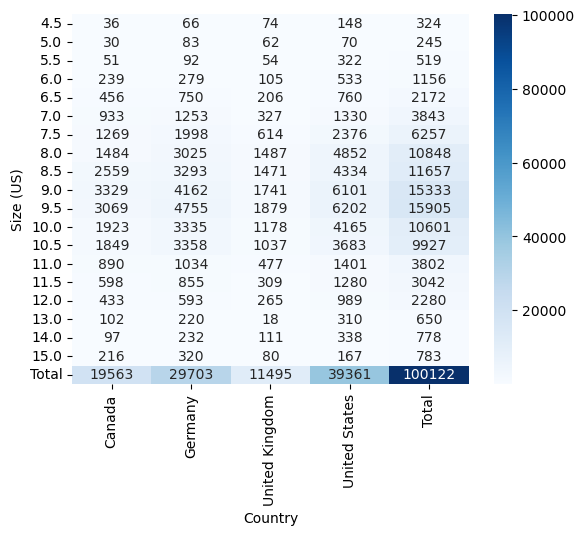

In [45]:
heatmap = sns.heatmap(size_by_country,annot=True, fmt='g', cmap='Blues')
heatmap


In [46]:
sales_mini_2014 = sales_mini[sales_mini['Year'] == 2014]
sales_mini_2015 = sales_mini[sales_mini['Year'] == 2015]
sales_mini_2016 = sales_mini[sales_mini['Year'] == 2016]
sales_mini_2014

,Country,Shop,Gender,Size (US),Year,Month,SalePrice,quarter,net,ProLoss
0,United Kingdom,UK2,Male,11.0,2014,1,159.0,Q1,-,0.0
1,United States,US15,Male,11.5,2014,1,159.2,Q1,L,-39.8
2,Canada,CAN7,Male,9.5,2014,1,119.2,Q1,L,-29.8
3,United States,US6,Female,9.5,2014,1,159.0,Q1,-,0.0
4,United Kingdom,UK4,Female,9.0,2014,1,159.0,Q1,-,0.0
...,...,...,...,...,...,...,...,...,...,...
2748,Canada,CAN5,Male,10.0,2014,12,74.5,Q4,L,-74.5
2749,United States,US8,Male,10.5,2014,12,118.3,Q4,L,-50.7
2750,United Kingdom,UK1,Female,8.5,2014,12,125.3,Q4,L,-53.7
2751,United Kingdom,UK1,Male,9.0,2014,12,104.3,Q4,L,-44.7


In [47]:
sales

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Year,Month,SalePrice,quarter,net,ProLoss
0,52389,2014-01-01,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0,Q1,-,0.0
1,52390,2014-01-01,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2,Q1,L,-39.8
2,52391,2014-01-01,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2,Q1,L,-29.8
3,52392,2014-01-01,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0,Q1,-,0.0
4,52393,2014-01-01,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0,Q1,-,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,2016-12-31,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,139,0.0,2016,12,139.0,Q4,-,0.0
14963,65774,2016-12-31,United States,2181,US12,Female,12.0,42-43,10.0,149,0.0,2016,12,149.0,Q4,-,0.0
14964,65775,2016-12-31,Canada,2203,CAN6,Male,10.5,43-44,10.0,179,0.3,2016,12,125.3,Q4,L,-53.7
14965,65776,2016-12-31,Germany,2231,GER1,Female,9.5,40,7.5,199,0.0,2016,12,199.0,Q4,-,0.0


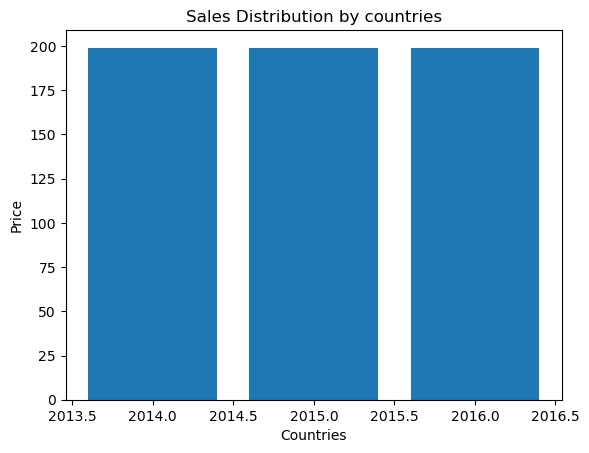

In [48]:
#Bar Graph Plot
plt.bar(sales['Year'],sales['UnitPrice'])
plt.xlabel('Countries')
plt.ylabel('Price')
plt.title('Sales Distribution by countries')
plt.show()

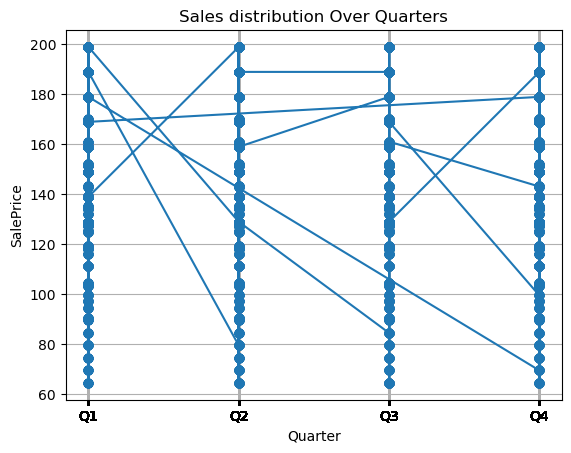

In [49]:
plt.plot(sales['quarter'],sales['SalePrice'], marker='o')
plt.xlabel('Quarter')
plt.ylabel('SalePrice')
plt.title('Sales distribution Over Quarters')
plt.xticks(sales['quarter'])
plt.grid(True)
plt.show()